In [46]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib import patches
#from basic_units import cm

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
city_data.head()
ride_data = pd.read_csv(ride_data_to_load)
ride_data.head()
# Combine the data into a single dataset
combine_data=pd.merge(ride_data, city_data, how="outer", on="city")
combine_data=combine_data.dropna(how="any")
combine_data.head()
# Display the data table for preview
combine_df=combine_data[["city","date","fare","ride_id","driver_count","type"]]
comb_df=combine_df.groupby(["city"]).head(1).reset_index(drop=True)
comb_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [47]:
combine_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [54]:
# Urban ride count per city
urban_ride_df=combine_df.loc[combine_df["type"]=="Urban"]
urban_city_ride=urban_ride_df.groupby("city")
urban_ride=urban_city_ride["ride_id"].count()


# Suburban ride count per city
suburban_ride_df=combine_df.loc[combine_df["type"]=="Suburban"]
suburban_city_ride=suburban_ride_df.groupby("city")
suburban_ride=suburban_city_ride["ride_id"].count()


#suburban_ride=suburban_city_ride.tolist()
# Rural ride count per city
rural_ride_df=combine_df.loc[combine_df["type"]=="Rural"]
rural_city_ride=rural_ride_df.groupby("city")
rural_ride=rural_city_ride["ride_id"].count()



x_axis_min=rural_ride.min()
x_axis_min
#x_axis_max=urban_city_ride.max()
x_axis_max=urban_ride.max()
x_axis_max


39

In [55]:
# Urban avg fare per city
urban_df=combine_df.loc[combine_df["type"]=="Urban",:] 
urban_avg=urban_df.groupby("city")
urban_avg_f=urban_avg["fare"].mean()

#urban_avg_old=urban_df.groupby(["city"])["fare"].mean()
urban_avg.head()
urban_avg.max()
#urban_avg_f=urban_avg.tolist()

# Suburban avg fare per city
suburban_df=combine_df.loc[combine_df["type"]=="Suburban",:] 
suburban_avg=suburban_df.groupby(["city"])["fare"].mean()
suburban_avg.head()
suburban_avg.min()
suburban_avg_f=suburban_avg.tolist()
# Rural avg fare per city
rural_df=combine_df.loc[combine_df["type"]=="Rural",:] 
rural_avg=rural_df.groupby(["city"])["fare"].mean()
#rural_avg.head()
rural_avg_f=rural_avg.tolist()

y_axis_max=int(rural_avg.max())
y_axis_max
y_axis_min=int(urban_avg_f.min())
y_axis_min

20

In [56]:
# Urban driver count
#urban_driver=urban_df.groupby(["city"])["driver_count"].sum()
urban_df=combine_df.loc[combine_df["type"]=="Urban",:]
urban_driver=urban_df.groupby(["city"])["driver_count"].min() * 10 # multiplecation of 10 is to increase the size of marker
urban_driver_count=urban_driver.tolist()

# Suburban driver count
suburban_df=combine_df.loc[combine_df["type"]=="Suburban",:]
suburban_driver=suburban_df.groupby(["city"])["driver_count"].min() * 10
suburban_driver_count=suburban_driver.tolist()
# Rural driver count
rural_df=combine_df.loc[combine_df["type"]=="Rural",:]
rural_driver=rural_df.groupby(["city"])["driver_count"].min() * 10
rural_driver_count=rural_driver.tolist()

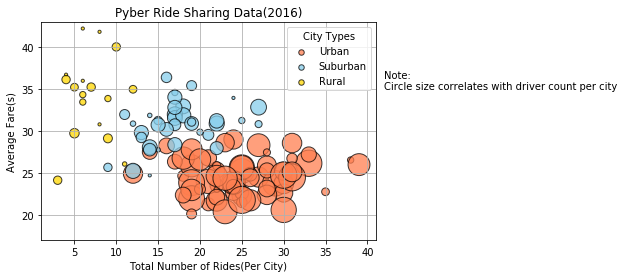

In [57]:
plt.figure()

plt.scatter(urban_ride, urban_avg_f, s=urban_driver_count , marker="o", facecolors="Coral", alpha=0.75, edgecolors="black",label="Urban")
plt.scatter(suburban_ride, suburban_avg_f, s=suburban_driver_count , marker="o", facecolors="skyblue", alpha=0.75, edgecolors="black",label="Suburban")
plt.scatter(rural_ride, rural_avg_f, s=rural_driver_count , marker="o", facecolors="gold", alpha=0.75, edgecolors="black",label="Rural")

# Plot legend.
#lgnd = plt.legend(loc="upper right", numpoints=1, fontsize=10)
lgnd = plt.legend(loc="upper right", title="City Types", scatterpoints=1, fontsize=10)
#scatterpoints
#change the marker size manually for both lines

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

#plt.gca().legend(("Urban","Suburban","Rural"))
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare(s)")
plt.text(42,35,"Note:\nCircle size correlates with driver count per city")
plt.axis([x_axis_min-2,x_axis_max+2,y_axis_min-3,y_axis_max])
plt.grid(True)
plt.show()



In [224]:
#plt.legend(handles=[urban,suburban,rural], loc="best")


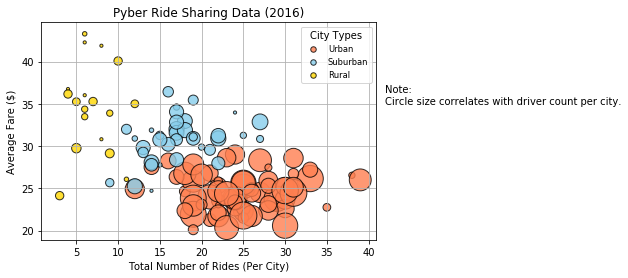

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

In [8]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


In [9]:
# Calculate Type Percents
# option display for float format
#pd.options.display.float_format = '${:,.1f}'.format
all_type_df=combine_df[["fare"]]
total_fare=all_type_df["fare"].sum()
    

In [10]:
# Urban total fare per city
type_df=combine_df.loc[combine_df["type"]=="Urban",:] 
urban_fare=type_df.groupby(["city"])["fare"].sum()
urban_fare_list=urban_fare.tolist()
urban_sum=0
for x in urban_fare_list:
    urban_sum=urban_sum + x
urban_sum
urban_percent=(urban_sum/total_fare)*100
urban_percent
# Suburban total fare per city
type_df=combine_df.loc[combine_df["type"]=="Suburban",:] 
suburban_fare=type_df.groupby(["city"])["fare"].sum()
suburban_fare_list=suburban_fare.tolist()
suburban_sum=0
for x in suburban_fare_list:
    suburban_sum=suburban_sum + x
suburban_sum
suburban_percent=(suburban_sum/total_fare)*100
suburban_percent
# Rural total fare per city
type_df=combine_df.loc[combine_df["type"]=="Rural",:] 
rural_fare=type_df.groupby(["city"])["fare"].sum()
rural_fare_list=rural_fare.tolist()
rural_sum=0
for x in rural_fare_list:
    rural_sum=rural_sum + x
rural_sum
rural_percent=(rural_sum/total_fare)*100
rural_percent

6.811492974983412

In [11]:
pies = ["Suburban", "Urban","Rural" ]
pie_fare = [suburban_percent,urban_percent,rural_percent]
colors = ["lightskyblue","pink","yellow"]
explode = (0,0.1,0)

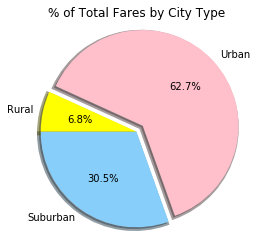

In [250]:
import matplotlib.patches as patch
import matplotlib.image as mpimg
#fig, ax = plt.subplots()
#plt.axis([2, 15, 0, 20]) 

plt.title("% of Total Fares by City Type")
#ax.set_title("% of Total Fares by City Type")
#fig = plt.figure(figsize=(4,3))
#ax = fig.add_subplot(111)
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(pie_fare, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180, wedgeprops={'linewidth': 4}, radius=1.10)
# Create axes which are equal so we have a perfect circle

fig.savefig('fig1.png', dpi = 300)



plt.show()

## Total Rides by City Type

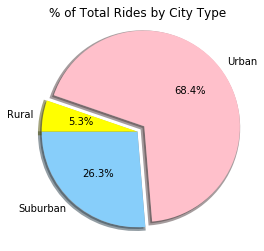

In [278]:
# Calculate Ride Percents
all_type_df=combine_df[["ride_id"]]
total_ride=all_type_df["ride_id"].count()
total_ride
# Urban total ride per city
type_df=combine_df.loc[combine_df["type"]=="Urban",:] 
urban_ride=type_df.groupby(["city"])["ride_id"].count()
urban_ride_list=urban_ride.tolist()

urban_rsum=0
for x in urban_ride_list:
    urban_rsum=urban_rsum + x
urban_rsum
urban_ride_percent=(urban_rsum/total_ride)*100
# Suburban total ride per city
type_df=combine_df.loc[combine_df["type"]=="Suburban",:] 
suburban_ride=type_df.groupby(["city"])["ride_id"].count()
suburban_ride_list=suburban_ride.tolist()

suburban_rsum=0
for x in suburban_ride_list:
    suburban_rsum=suburban_rsum + x
suburban_rsum
suburban_ride_percent=(suburban_rsum/total_ride)*100
# Rural total ride per city
type_df=combine_df.loc[combine_df["type"]=="Rural",:] 
rural_ride=type_df.groupby(["city"])["ride_id"].count()
rural_ride_list=rural_ride.tolist()

rural_rsum=0
for x in rural_ride_list:
    rural_rsum=rural_rsum + x
rural_rsum
rural_ride_percent=(rural_rsum/total_ride)*100
# Build Pie Chart
pies = ["Suburban", "Urban","Rural" ]
pie_ride = [suburban_ride_percent,urban_ride_percent,rural_ride_percent]
colors = ["lightskyblue","pink","yellow"]
explode = (0,0.1,0)
plt.title("% of Total Rides by City Type")
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(pie_ride, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180, wedgeprops={'linewidth': 4}, radius=1.10)
# Save Figure
#urban_ride_list
#suburban_ride_percen
rural_ride_percen
plt.show()

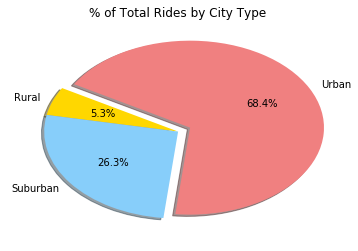

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

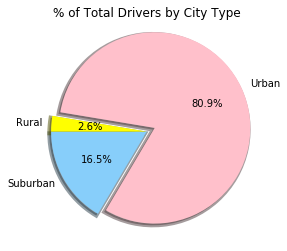

In [277]:
# Calculate Driver Percents
# total driver of all the city
all_type_df=comb_df[["driver_count"]]
total_driver=all_type_df["driver_count"].sum()
total_driver
# Urban driver percent by city
urban_df=combine_df.loc[combine_df["type"]=="Urban",:]
urban_driver=urban_df.groupby(["city"])["driver_count"].min()
urban_driver_list=urban_driver.tolist()
urban_driver_sum=0
for x in urban_driver_list:
    urban_driver_sum=urban_driver_sum + x
urban_driver_sum
urban_driver_percent=(urban_driver_sum/total_driver)*100
urban_driver_percent
# Suburban driver percent by city
suburban_df=combine_df.loc[combine_df["type"]=="Suburban",:]
suburban_driver=suburban_df.groupby(["city"])["driver_count"].min()
suburban_driver_list=suburban_driver.tolist()
suburban_driver_sum=0
for x in suburban_driver_list:
    suburban_driver_sum=suburban_driver_sum + x
suburban_driver_sum
suburban_driver_percent=(suburban_driver_sum/total_driver)*100
suburban_driver_percent
# Rural driver percent by city
rural_df=combine_df.loc[combine_df["type"]=="Rural",:]
rural_driver=rural_df.groupby(["city"])["driver_count"].min()
rural_driver_list=rural_driver.tolist()
rural_driver_sum=0
for x in rural_driver_list:
    rural_driver_sum=rural_driver_sum + x
rural_driver_sum
rural_driver_percent=(rural_driver_sum/total_driver)*100
rural_driver_percent
# Build Pie Charts

pies = ["Suburban", "Urban","Rural" ]
pie_ride = [suburban_driver_percent,urban_driver_percent,rural_driver_percent]
colors = ["lightskyblue","pink","yellow"]
explode = (0,0.1,0)
plt.title("% of Total Drivers by City Type")
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(pie_ride, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180, wedgeprops={'linewidth': 4}, radius=1.10)
# Save Figure
#all_type_df
#total_driver
plt.show()

In [254]:
combine_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


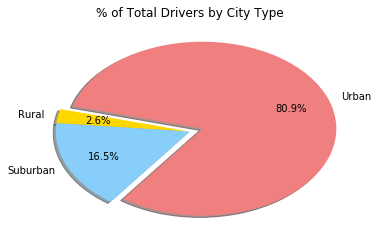

In [6]:
# Show Figure
plt.show()